# 서울특별시 공공자전거 따릉이 대여이력 분석
* [miningful/seoulbike: 따릉이 따세권EDA](https://github.com/miningful/seoulbike)에서 흥미를 얻어 분석을 시작하게 됨

## 데이터 출처 :
* 서울특별시 공공자전거 대여이력 정보
http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-15182&srvType=F&serviceKind=1&currentPageNo=1

* `(이달의주요공개정보)_서울_공공자전거(따릉이)_이용현황 자료(161021).xlsx (1.24MB)`
https://opengov.seoul.go.kr/anspruch/10045476


## 관련자료 
* [(석간) 서울시 따릉이 회원 62만 돌파 출 퇴근시간 38% 집중](http://spp.seoul.go.kr/main/news/news_report.jsp#view/253821)
* [공공자전거 따릉이 인기 따라 '따세권' 형성…소외지역도 :: 공감언론 뉴시스통신사 ::](http://www.newsis.com/view/?id=NISX20180706_0000356247&cID=10201&pID=10200)
* [서울특별시 빅데이터 캠퍼스 > 분석결과/사례공유 > 서울시 분석사례 > 서울시 자전거 이동경로 분석](https://bigdata.seoul.go.kr/noti/selectNoti.do?r_id=P430&bbs_seq=229&sch_type=&sch_text=&currentPage=1)
* [따릉이 편리하게 이용하기 위한 14가지 | 서울시 정보소통광장(정보공개)](https://opengov.seoul.go.kr/mediahub/15085803)

In [1]:
# 노트북이 간결해 보이도록 경고 문구는 출력되지 않도록 함
# 프로그래밍에 익숙하다면 경고 문구도 출력해서 보도록 한다. 
# 하지만 익숙하지 않다면 당황하지 않기 위해 경고 메시지는 찍히지 않도록 한다.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 사용할 도구 가져오기

In [2]:
import pandas as pd
import numpy as np
from plotnine import *


# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## 데이터 불러오기
* 서울시정보소통광장에서 다운로드 받은 csv파일과 크롤링해온 대여소 정보가 있다.
* 이 노트북에서는 전체 데이터 중 일부 데이터만을 사용해서 특정 시기의 데이터만 분석해 보고 점점 더 큰 데이터를 불러와 보도록 한다.

In [3]:
%ls data/

bike_rent_station.csv
bike_rent_station_gu.csv
seoul-bike-2018.csv
서울_공공자전거_따릉이_이용현황자료_20161026.xlsx
서울특별시 공공자전거 대여이력 정보_2015년.csv
서울특별시 공공자전거 대여이력 정보_2016년_1.csv
서울특별시 공공자전거 대여이력 정보_2016년_2.csv
서울특별시 공공자전거 대여이력 정보_2016년_3.csv
서울특별시 공공자전거 대여이력 정보_2017년_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_2분기_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_2분기_2.csv
서울특별시 공공자전거 대여이력 정보_2017년_3분기_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_3분기_2.csv
서울특별시 공공자전거 대여이력 정보_2017년_4분기_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_4분기_2.csv
서울특별시 공공자전거 대여이력 정보_2018년_1분기1.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_1.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_2.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_3.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_4.csv


In [4]:
# df = pd.read_csv('data/서울특별시 공공자전거 대여이력 정보_2018년_2분기_4.csv', encoding='cp949')
# 2018년 2분기까지의 데이터를 보고 싶다면 아래 파일을 불러온다.
%time df = pd.read_csv('data/seoul-bike-2018.csv')
df.shape

CPU times: user 9.96 s, sys: 1.01 s, total: 11 s
Wall time: 11.2 s


(3567221, 11)

## 데이터 미리보기 및 요약하기
* head와 tail을 통해 데이터 미리보기를 해볼 수 있다.
* head는 데이터의 윗부분을 tail은 데이터의 하단부를 미리보기 해준다. 
* 괄호안에 숫자를 넣어주면 해당 숫자만큼의 데이터를 가져온다. 기본값은 5이다.

In [5]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,SPB-02041,2018-01-01 00:00:10,227,양평2나들목 보행통로 입구,9,2018-01-01 00:04:03,227,양평2나들목 보행통로 입구,9,3,50
1,SPB-03796,2018-01-01 00:00:42,2219,"고속터미널역 8-1번, 8-2번 출구 사이",15,2018-01-01 00:25:41,3511,응봉역 1번출구,9,24,7670
2,SPB-02402,2018-01-01 00:00:58,567,성수역 2번출구 앞,13,2018-01-01 00:09:33,3506,영동대교 북단,2,8,1390
3,SPB-01564,2018-01-01 00:01:02,568,청계8가사거리 부근,5,2018-01-01 00:10:13,521,왕십리역 11번 출구 앞,9,8,1820
4,SPB-05713,2018-01-01 00:01:03,361,동묘앞역 1번출구 뒤,4,2018-01-01 00:06:18,383,신당역 12번 출구 뒤,8,4,850


In [6]:
df.tail()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
3567216,SPB-15985,2018-06-30 23:59:55,505,자양사거리 광진아크로텔 앞,9,2018-07-01 00:09:38,593,자양중앙나들목,5,9,1230
3567217,SPB-15081,2018-06-30 23:59:55,1328,월곡역 3번출구,7,2018-07-01 00:18:02,647,신이문역 1번출구,7,17,3600
3567218,SPB-13677,2018-06-30 23:59:57,2376,수서역 6번출구 앞,2,2018-07-01 00:20:38,2387,래미안강남힐즈 사거리,5,20,2590
3567219,SPB-06577,2018-06-30 23:59:57,1251,석촌역 2번출구,2,2018-07-01 00:57:29,1245,문정 법조단지9,4,57,6640
3567220,SPB-03842,2018-06-30 23:59:58,2169,봉천역 2번출구,6,2018-07-01 00:08:05,2112,서울대입구역 마에스트로,7,7,910


* info를 사용하면 해당 데이터의 요약정보를 볼 수 있다.
* 데이터의 갯수와 데이터의 타입, 크기 등을 볼 수 있다.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3567221 entries, 0 to 3567220
Data columns (total 11 columns):
자전거번호      object
대여일시       object
대여대여소번호    object
대여대여소명     object
대여거치대      int64
반납일시       object
반납대여소번호    object
반납대여소명     object
반납거치대      int64
이용시간(분)    int64
이용거리(M)    int64
dtypes: int64(4), object(7)
memory usage: 299.4+ MB


In [8]:
df.describe()

,대여거치대,반납거치대,이용시간(분),이용거리(M)
count,3.567221e+06,3.567221e+06,3.567221e+06,3.567221e+06
mean,7.047700e+00,7.011452e+00,2.890259e+01,4.600026e+03
std,5.309360e+00,5.309633e+00,3.068767e+01,7.832158e+03
min,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
25%,3.000000e+00,3.000000e+00,9.000000e+00,1.290000e+03
50%,6.000000e+00,6.000000e+00,1.800000e+01,2.490000e+03
75%,1.000000e+01,1.000000e+01,4.000000e+01,5.160000e+03
max,4.000000e+01,4.000000e+01,4.320000e+03,2.559100e+05


In [9]:
df.describe(include=np.object)

,자전거번호,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명
count,3567221,3567221,3567221,3567221,3567221,3567221,3567221
unique,16683,2772791,1275,1275,2799941,1276,1276
top,SPB-08164,2018-05-05 16:45:37,207,여의나루역 1번출구 앞,2018-05-11 20:38:17,207,여의나루역 1번출구 앞
freq,578,97,29705,29705,42,28969,28969


## 분석을 위한 전처리
* 위에서 데이터를 미리보기 했을 때 컬럼과 데이터에 불필요한 홑따옴표가 포함되어 있다.
* 전처리를 통해 제거해 준다.
* object 타입의 데이터에는 모두 홑따옴표가 들어가 있다. 따라서 object 데이터 타입이라면 홑따옴표를 제거해 주도록 한다.

In [10]:
# 컬럼에 있는 '를 제거한다.
df.columns = df.columns.str.strip("'")

In [11]:
# 불필요하게 '가 들어가 있다. 스트링 타입으로 되어있는 데이터에서 '을 제거하자.
# 2018년 전체 데이터를 모아놓은 csv에서는 미리 제거해서 넣어두었다.
df = df.apply(lambda x: x.str.strip("'") if x.dtype == np.dtype('object') else x)

# 다음의 방법으로 제거할 수도 있다.
# df.iloc[:, :4] = df.iloc[:, :4].apply(lambda x: x.str.strip("'"))
# df.iloc[:, 5:8] = df.iloc[:, 5:8].apply(lambda x: x.str.strip("'"))

In [12]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,SPB-02041,2018-01-01 00:00:10,227,양평2나들목 보행통로 입구,9,2018-01-01 00:04:03,227,양평2나들목 보행통로 입구,9,3,50
1,SPB-03796,2018-01-01 00:00:42,2219,"고속터미널역 8-1번, 8-2번 출구 사이",15,2018-01-01 00:25:41,3511,응봉역 1번출구,9,24,7670
2,SPB-02402,2018-01-01 00:00:58,567,성수역 2번출구 앞,13,2018-01-01 00:09:33,3506,영동대교 북단,2,8,1390
3,SPB-01564,2018-01-01 00:01:02,568,청계8가사거리 부근,5,2018-01-01 00:10:13,521,왕십리역 11번 출구 앞,9,8,1820
4,SPB-05713,2018-01-01 00:01:03,361,동묘앞역 1번출구 뒤,4,2018-01-01 00:06:18,383,신당역 12번 출구 뒤,8,4,850


In [13]:
df.tail()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
3567216,SPB-15985,2018-06-30 23:59:55,505,자양사거리 광진아크로텔 앞,9,2018-07-01 00:09:38,593,자양중앙나들목,5,9,1230
3567217,SPB-15081,2018-06-30 23:59:55,1328,월곡역 3번출구,7,2018-07-01 00:18:02,647,신이문역 1번출구,7,17,3600
3567218,SPB-13677,2018-06-30 23:59:57,2376,수서역 6번출구 앞,2,2018-07-01 00:20:38,2387,래미안강남힐즈 사거리,5,20,2590
3567219,SPB-06577,2018-06-30 23:59:57,1251,석촌역 2번출구,2,2018-07-01 00:57:29,1245,문정 법조단지9,4,57,6640
3567220,SPB-03842,2018-06-30 23:59:58,2169,봉천역 2번출구,6,2018-07-01 00:08:05,2112,서울대입구역 마에스트로,7,7,910


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3567221 entries, 0 to 3567220
Data columns (total 11 columns):
자전거번호      object
대여일시       object
대여대여소번호    object
대여대여소명     object
대여거치대      int64
반납일시       object
반납대여소번호    object
반납대여소명     object
반납거치대      int64
이용시간(분)    int64
이용거리(M)    int64
dtypes: int64(4), object(7)
memory usage: 299.4+ MB


In [15]:
df.describe(include=np.object)

,자전거번호,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명
count,3567221,3567221,3567221,3567221,3567221,3567221,3567221
unique,16683,2772791,1275,1275,2799941,1276,1276
top,SPB-08164,2018-05-05 16:45:37,207,여의나루역 1번출구 앞,2018-05-11 20:38:17,207,여의나루역 1번출구 앞
freq,578,97,29705,29705,42,28969,28969


## 결측치 보기

In [16]:
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간(분)    0
이용거리(M)    0
dtype: int64

## 결측치 시각화 하기
* missingno는 별도로 설치해야 하는 시각화 도구 입니다. 결측치를 시각화해서 볼 수 있습니다.

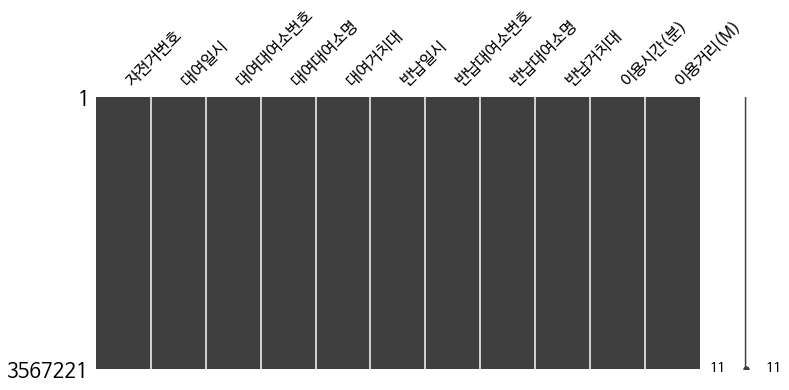

In [17]:
# 결측치 보기
import missingno as msno

msno.matrix(df, figsize=(12,5))

## 대여소별 대여|반납 현황

In [18]:
print('# 대여소 수')
print('대여 대여소: ', df['대여대여소번호'].unique().shape[0])
print('반납 대여소: ', df['반납대여소번호'].unique().shape[0])

# 대여소 수
대여 대여소:  1275
반납 대여소:  1276


In [19]:
df['대여대여소번호'].value_counts().tail(10)

938         218
2275        183
2382        128
1040         92
2287         90
2286         72
2288         72
상암센터 정비실     61
554           7
위트콤           3
Name: 대여대여소번호, dtype: int64

* 대여 대여소번호에 상암센터 정비실과 위트콤 같은 숫자가 아닌 곳들이 있음

In [20]:
# 대여량이 많은 상위 대여소
df['대여대여소명'].value_counts().head(10)

 여의나루역 1번출구 앞               29705
 뚝섬유원지역 1번출구 앞              23141
 홍대입구역 2번출구 앞               20833
 롯데월드타워(잠실역2번출구 쪽)          17529
 봉림교 교통섬                    15285
 고속터미널역 8-1번, 8-2번 출구 사이    15269
 마포구민체육센터 앞                 13490
 안암로터리 버스정류장 앞              12081
 신도림역 1번 출구 앞               11737
 건국대학교 (입학정보관)              11252
Name: 대여대여소명, dtype: int64

In [21]:
# 반납량이 많은 상위 대여소
df['반납대여소명'].value_counts().head(10)

 여의나루역 1번출구 앞               28969
 뚝섬유원지역 1번출구 앞              27315
 홍대입구역 2번출구 앞               26282
 롯데월드타워(잠실역2번출구 쪽)          17565
 고속터미널역 8-1번, 8-2번 출구 사이    16127
 마포구민체육센터 앞                 15803
 봉림교 교통섬                    15521
 안암로터리 버스정류장 앞              13506
 CJ 드림시티                    13125
 IFC몰                       11818
Name: 반납대여소명, dtype: int64

1. 대여반납이 많은 상위 대여소인 홍대입구역, 여의나루역, 뚝섬유원지, 롯데월드타워는 모두 강이나 호수를 인근에 두고 있다. 
2. 성대입구나 안암로터리 버스정류장은 대학가 인근이다.

In [22]:
# 평균 이용거리가 긴 상위 대여소
df.groupby(['대여대여소명'])['이용거리(M)'].mean().reset_index().sort_values(by='이용거리(M)', ascending=False).head(10)

,대여대여소명,이용거리(M)
353,동작역 5번출구 동작주차공원,9572.755040
330,독산보도육교 앞 자전거 보관소,9555.473776
333,독산주공 14단지 버스정류소,9338.485915
1237,흑석역 1번출구,9102.599215
1179,한신아파트 앞 육교 아래,9015.589942
1170,한남나들목 입구,8920.392581
1228,황금내근린공원,8856.140845
87,강일동 에너지 마루,8776.413043
1203,현대자동차서비스 앞,8531.929412
280,달맞이공원,8530.050000


In [23]:
# 평균 이용거리가 짧은 대여소
df.groupby(['대여대여소명'])['이용거리(M)'].mean().reset_index().sort_values(by='이용거리(M)', ascending=True).head()

,대여대여소명,이용거리(M)
1268,위트콤,0.000000
1255,상암센터 정비실,222.786885
188,국군복지단,2259.677419
940,원남동사거리,2475.705792
641,서울보증보험본사 앞,2477.996178


In [24]:
# 평균 이용시간이 많은 상위 대여소
df.groupby(['대여대여소명'])['이용시간(분)'].mean().reset_index().sort_values(by='이용시간(분)', ascending=False).head()

,대여대여소명,이용시간(분)
353,동작역 5번출구 동작주차공원,60.006720
648,서울숲 관리사무소,57.964699
649,서울숲 남문 버스정류소 옆,55.532017
118,"고속터미널역 8-1번, 8-2번 출구 사이",54.207348
1200,현대고등학교 건너편,53.474594


In [25]:
# 평균 이용시간이 적은 상위 대여소
df.groupby(['대여대여소명'])['이용시간(분)'].mean().reset_index().sort_values(by='이용시간(분)', ascending=True).head()

,대여대여소명,이용시간(분)
1255,상암센터 정비실,10.836066
7,CJ오쇼핑앞,13.718310
521,봉원고가차도 밑,13.915630
656,서울시립대 앞,14.015023
188,국군복지단,14.356033


## 시계열 데이터 보기

In [26]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])
df.dtypes

자전거번호              object
대여일시       datetime64[ns]
대여대여소번호            object
대여대여소명             object
대여거치대               int64
반납일시       datetime64[ns]
반납대여소번호            object
반납대여소명             object
반납거치대               int64
이용시간(분)             int64
이용거리(M)             int64
dtype: object

In [27]:
df['대여년월일'] = df['대여일시'].dt.date
df['반납년월일'] = df['반납일시'].dt.date
df['대여년'] = df['대여일시'].dt.year
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여시'] = df['대여일시'].dt.hour
df['대여분'] = df['대여일시'].dt.minute
df['대여요일'] = df['대여일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년월일', '반납년월일', '대여년', '대여월',
       '대여일', '대여시', '대여분', '대여요일'],
      dtype='object')

In [28]:
df['반납년월일'] = df['반납일시'].dt.date
df['반납년월일'] = df['반납일시'].dt.date
df['반납년'] = df['반납일시'].dt.year
df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납시'] = df['반납일시'].dt.hour
df['반납분'] = df['반납일시'].dt.minute
df['반납요일'] = df['반납일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년월일', '반납년월일', '대여년', '대여월',
       '대여일', '대여시', '대여분', '대여요일', '반납년', '반납월', '반납일', '반납시', '반납분', '반납요일'],
      dtype='object')

In [29]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여일,대여시,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일
0,SPB-02041,2018-01-01 00:00:10,227,양평2나들목 보행통로 입구,9,2018-01-01 00:04:03,227,양평2나들목 보행통로 입구,9,3,...,1,0,0,0,2018,1,1,0,4,0
1,SPB-03796,2018-01-01 00:00:42,2219,"고속터미널역 8-1번, 8-2번 출구 사이",15,2018-01-01 00:25:41,3511,응봉역 1번출구,9,24,...,1,0,0,0,2018,1,1,0,25,0
2,SPB-02402,2018-01-01 00:00:58,567,성수역 2번출구 앞,13,2018-01-01 00:09:33,3506,영동대교 북단,2,8,...,1,0,0,0,2018,1,1,0,9,0
3,SPB-01564,2018-01-01 00:01:02,568,청계8가사거리 부근,5,2018-01-01 00:10:13,521,왕십리역 11번 출구 앞,9,8,...,1,0,1,0,2018,1,1,0,10,0
4,SPB-05713,2018-01-01 00:01:03,361,동묘앞역 1번출구 뒤,4,2018-01-01 00:06:18,383,신당역 12번 출구 뒤,8,4,...,1,0,1,0,2018,1,1,0,6,0


In [30]:
df_month_1 = df['대여월'].value_counts().reset_index()
df_month_1.columns = ['month', 'count']

df_month_1 = df_month_1.sort_values('month')
df_month_1['대여반납'] = '대여'
print(df_month_1.shape)

df_month_2 = df['반납월'].value_counts().reset_index()
df_month_2.columns = ['month', 'count']
df_month_2 = df_month_2.sort_values('month')
df_month_2['대여반납'] = '반납'
print(df_month_2.shape)

df_month = pd.concat([df_month_1, df_month_2])
print(df_month.shape)
df_month.head()

(6, 3)
(7, 3)
(13, 3)


,month,count,대여반납
5,1,161859,대여
4,2,166337,대여
3,3,456538,대여
2,4,677878,대여
1,5,951446,대여


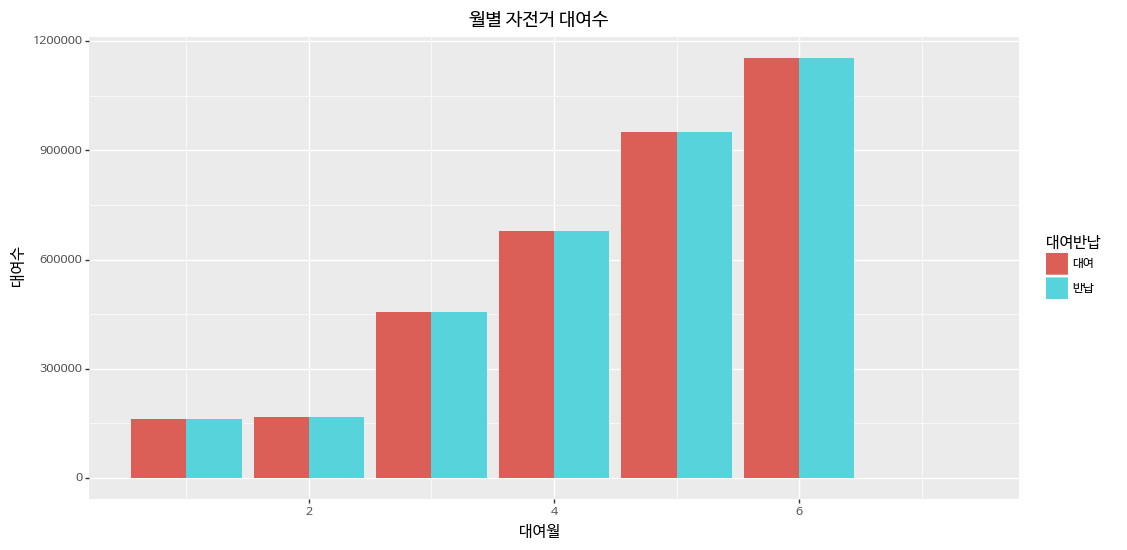

<ggplot: (-9223372036580373700)>

In [31]:
(ggplot(df_month)
 + aes(x='month', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + labs(x='대여월', y='대여수', title='월별 자전거 대여수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(12,6))
)

## 일자별 대여|반납 현황
* 날짜에 따라 대여|반납 횟수를 확인한다.

In [32]:
df_day_1 = df['대여일'].value_counts().reset_index()
df_day_1.columns = ['day', 'count']

df_day_1 = df_day_1.sort_values('day')
df_day_1['대여반납'] = '대여'
print(df_day_1.shape)

df_day_2 = df['반납일'].value_counts().reset_index()
df_day_2.columns = ['day', 'count']
df_day_2 = df_day_2.sort_values('day')
df_day_2['대여반납'] = '반납'
print(df_day_2.shape)

df_day = pd.concat([df_day_1, df_day_2])
print(df_day.shape)
df_day.head()

(31, 3)
(31, 3)
(62, 3)


,day,count,대여반납
14,1,114513,대여
28,2,100061,대여
10,3,118565,대여
11,4,117827,대여
21,5,104937,대여


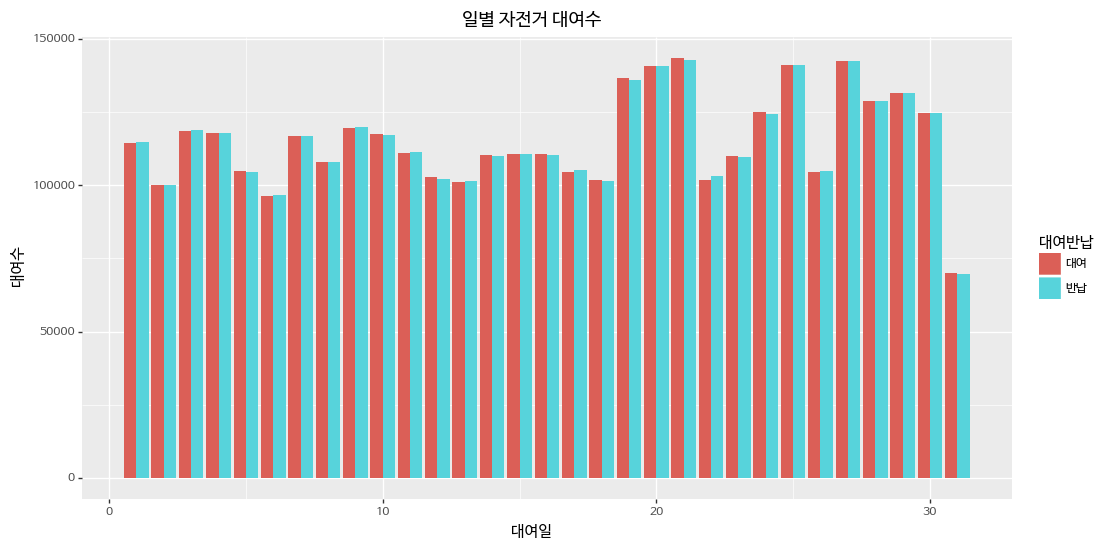

<ggplot: (390360093)>

In [33]:
(ggplot(df_day)
 + aes(x='day', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + labs(x='대여일', y='대여수', title='일별 자전거 대여수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(12,6))
)

In [34]:
df_ymd_1 = df['대여년월일'].value_counts().reset_index()
df_ymd_1.columns = ['ymd', 'count']

df_ymd_1 = df_ymd_1.sort_values('ymd')
df_ymd_1['대여반납'] = '대여'
print(df_ymd_1.shape)

df_ymd_2 = df['반납년월일'].value_counts().reset_index()
df_ymd_2.columns = ['ymd', 'count']
df_ymd_2 = df_ymd_2.sort_values('ymd')
df_ymd_2['대여반납'] = '반납'
print(df_ymd_2.shape)

df_ymd = pd.concat([df_ymd_1, df_ymd_2])
print(df_ymd.shape)
df_ymd.head()

(181, 3)
(184, 3)
(365, 3)


,ymd,count,대여반납
151,2018-01-01,4881,대여
125,2018-01-02,7028,대여
124,2018-01-03,7036,대여
126,2018-01-04,7008,대여
119,2018-01-05,7590,대여


In [35]:
# 시간데이터로 표현하기 위해 타입을 바꿔준다.
df_ymd["ymd"] = pd.to_datetime(df_ymd["ymd"])

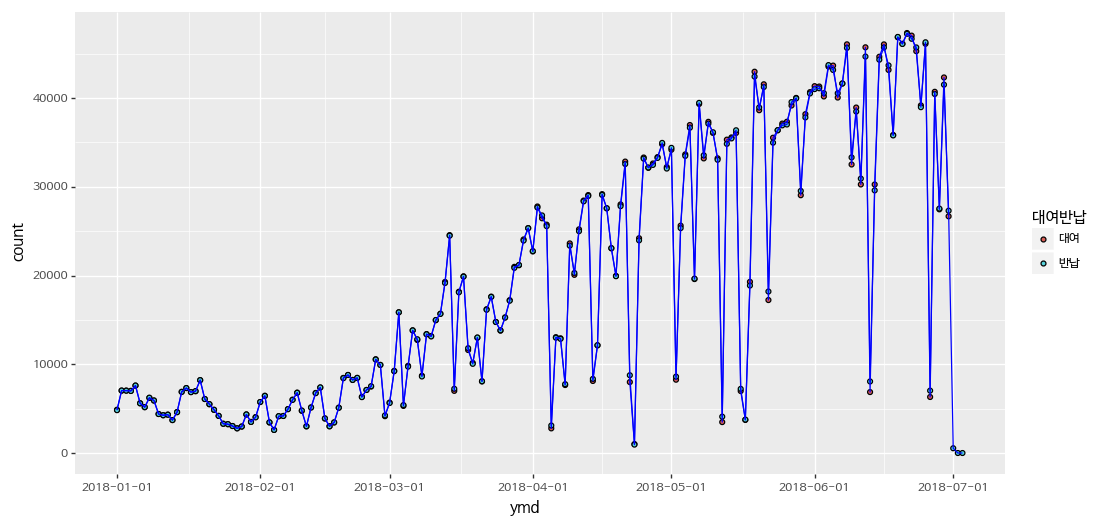

<ggplot: (-9223372036548107355)>

In [36]:
(ggplot(df_ymd)
 + aes(x='ymd', y='count', fill="대여반납")
 + geom_point()
 + geom_line(color='blue')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(12,6))
)

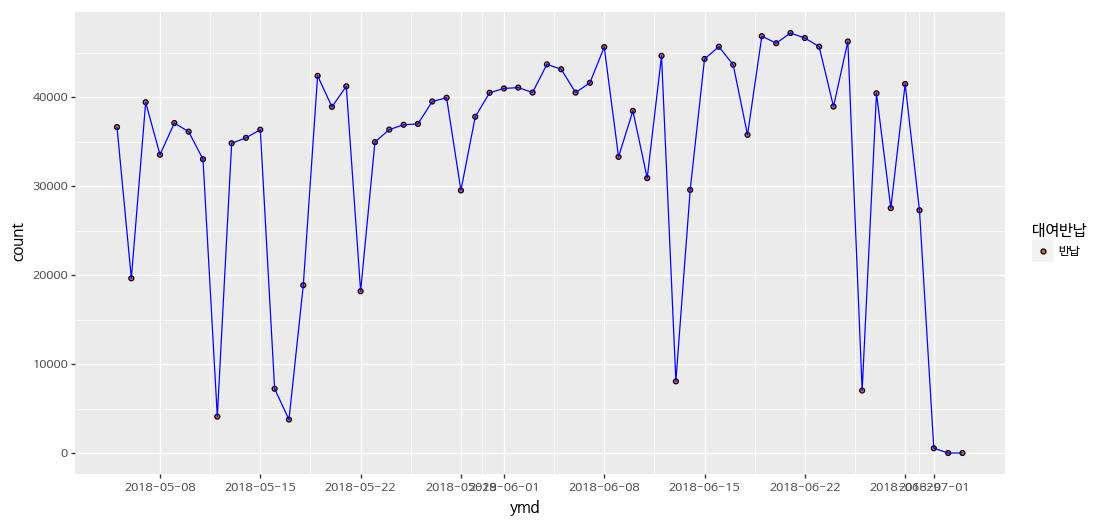

<ggplot: (434812459)>

In [37]:
# 최근 30일치 데이터를 가져온다. 대여반납 2가지 데이터가 있기 때문에 -60으로 30일치의 데이터를 가져온다.
(ggplot(df_ymd[-60:])
 + aes(x='ymd', y='count', fill="대여반납")
 + geom_point()
 + geom_line(color='blue')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(12,6))
)

* 일부 날짜의 데이터만 있다.
* 2018년 6월 데이터만 봤을 때 13, 26일에는 대여와 반납모두 적다.
* 26일의 일기예보를 보면 장맛비가 내린것을 확인해 볼 수 있다. https://www.youtube.com/watch?v=cYHC8iwfFyU

## 요일별 대여|반납 현황
* 대여|반납별로 어떤 요일에 주로 대여반납이 되는지 시각화해보기 위해 Tidy Data를 만든다.

In [38]:
df_dow_1 = df['대여요일'].value_counts().reset_index()
df_dow_1.columns = ['dayofweek', 'count']
df_dow_1 = df_dow_1.sort_values('dayofweek')
df_dow_1['대여반납'] = '대여'
print(df_dow_1.shape)

df_dow_2 = df['반납요일'].value_counts().reset_index()
df_dow_2.columns = ['dayofweek', 'count']
df_dow_2 = df_dow_2.sort_values('dayofweek')
df_dow_2['대여반납'] = '반납'
print(df_dow_2.shape)

df_dow = pd.concat([df_dow_1, df_dow_2])
print(df_dow.shape)

(7, 3)
(7, 3)
(14, 3)


In [39]:
df_dow.head(3)

,dayofweek,count,대여반납
1,0,532415,대여
3,1,511400,대여
4,2,483927,대여


In [40]:
df_dow.tail(3)

,dayofweek,count,대여반납
0,4,571582,반납
2,5,526180,반납
6,6,464013,반납


In [41]:
weekday_map= {0:'MON', 1:'TUE', 2:'WED', 3:'THU',
              4:'FRI', 5:'SAT', 6:'SUN'}

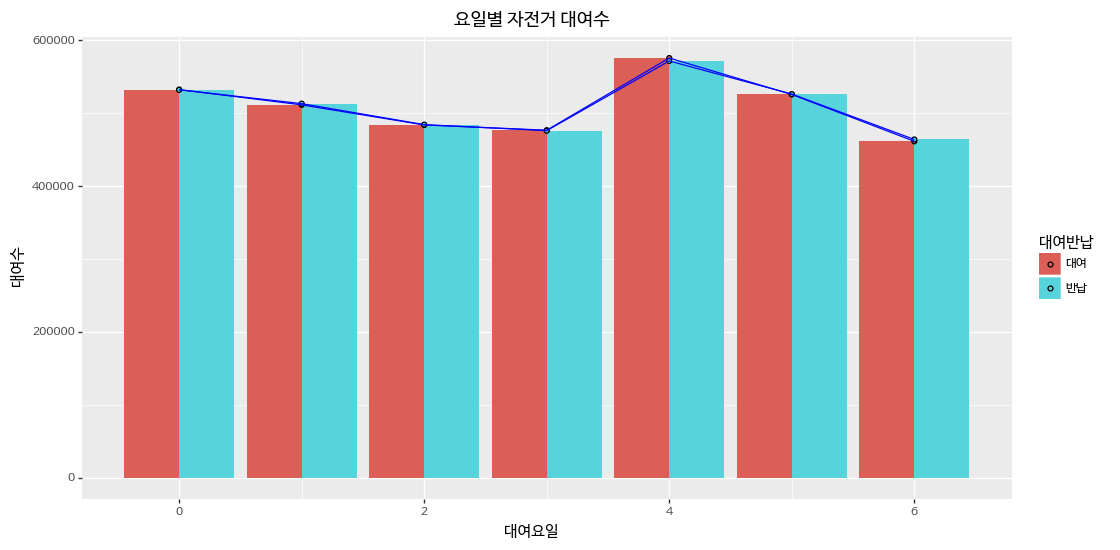

<ggplot: (-9223372036420024197)>

In [42]:
(ggplot(df_dow)
 + aes(x='dayofweek', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='대여요일', y='대여수', title='요일별 자전거 대여수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(12,6))
)

## 시간대별 대여|반납량

In [43]:
df_hour_1 = df['대여시'].value_counts().reset_index()
df_hour_1.columns = ['hour', 'count']
df_hour_1 = df_hour_1.sort_values('hour')
df_hour_1['대여반납'] = '대여'
df_hour_1.head()

df_hour_2 = df['반납시'].value_counts().reset_index()
df_hour_2.columns = ['hour', 'count']
df_hour_2 = df_hour_2.sort_values('hour')
df_hour_2['대여반납'] = '반납'
df_hour_2.head()

df_hour = pd.concat([df_hour_1, df_hour_2])
df_hour.head()

,hour,count,대여반납
16,0,101820,대여
18,1,78734,대여
19,2,55113,대여
21,3,35216,대여
23,4,22110,대여


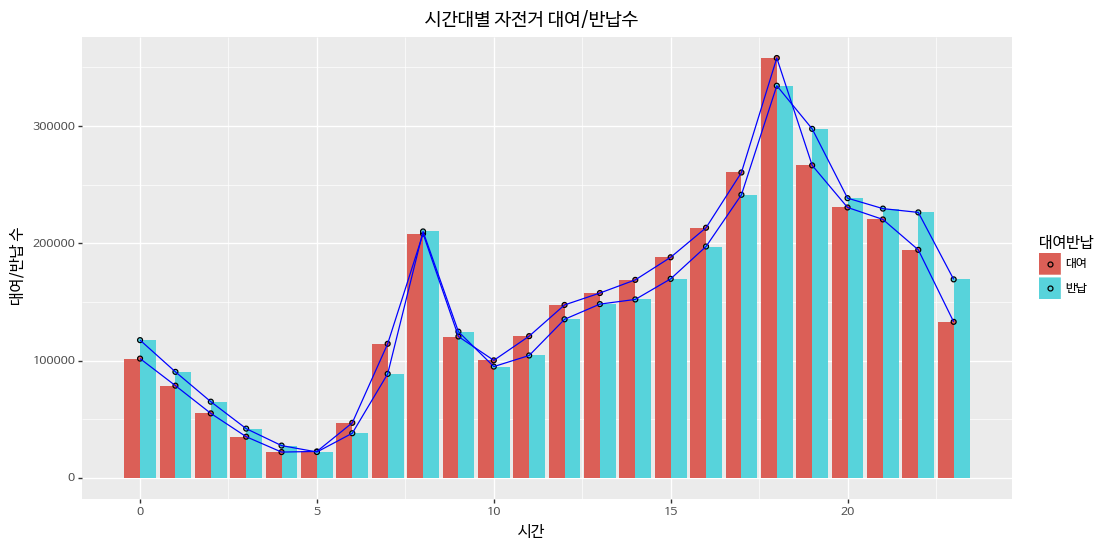

<ggplot: (434729883)>

In [44]:
(ggplot(df_hour)
 + aes(x='hour', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='시간', y='대여/반납 수', title='시간대별 자전거 대여/반납수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(12,6))
)

* 새벽시간대로 갈 수록 대여/반납 수가 줄어든다.
* 출근시간대에는 대여가 반납보다 많다.
* 오전에는 8시대에 대여/반납이 많으며, 오후시간대에는 18시에 대여/반납이 가장 많다.
* 오전 11시부터 20시까지는 대여가 반납보다 많다.(대여>반납)
* 21시 이후부터 오전 4시까지는 대여보다 반납이 많다.(대여<반납)

In [45]:
df_minute_1 = df['대여분'].value_counts().reset_index()
df_minute_1.columns = ['minute', 'count']
df_minute_1 = df_minute_1.sort_values('minute')
df_minute_1['대여반납'] = '대여'
print(df_minute_1.shape)

df_minute_2 = df['반납분'].value_counts().reset_index()
df_minute_2.columns = ['minute', 'count']
df_minute_2 = df_minute_2.sort_values('minute')
df_minute_2['대여반납'] = '반납'
print(df_minute_2.shape)

df_minute = pd.concat([df_minute_1, df_minute_2])
print(df_minute.shape)

(60, 3)
(60, 3)
(120, 3)


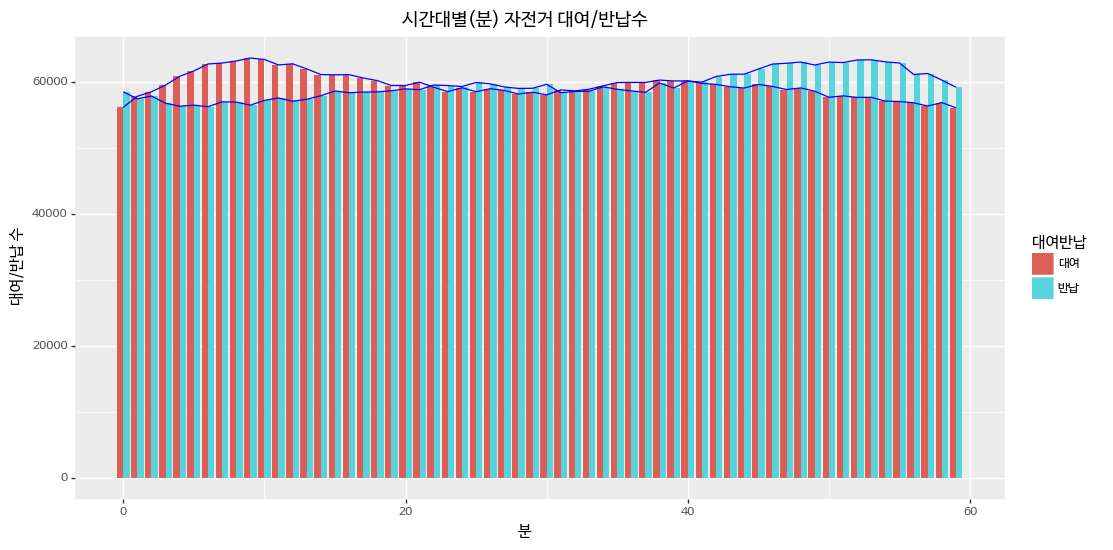

<ggplot: (274375677)>

In [46]:
(ggplot(df_minute)
 + aes(x='minute', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_line(color='blue')
 + labs(x='분', y='대여/반납 수', title='시간대별(분) 자전거 대여/반납수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(12,6))
)

* 대여/반납이 거의 비슷하게 이루어지고 있지만 대여는 0~20분 사이에 더 많이 일어나며 반납은 40~60분 사이에 더 많이 일어난다.

## 대여와 반납은 같은 곳에서 이루어지고 있을까?

In [47]:
# 같은대여반납소라는 컬럼을 새로 만들고 대여반납이 같은 곳에서 이루어지고 있는지 여부를 추가한다.
df['같은대여반납소'] = df['대여대여소명'] == df['반납대여소명']

In [48]:
df_location_diff = df['같은대여반납소'].value_counts().reset_index()
df_location_diff.columns = ['일치여부', '대여반납수']
# 같은|다른 반납소별로 대여반납수가 몇 배나 차이가 나는지 확인한다.
location_diff_ratio = df_location_diff['대여반납수'][0]/df_location_diff['대여반납수'][1]
print('같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 {0:.2f}배 많다.'.format(location_diff_ratio))
df_location_diff

같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 7.87배 많다.


,일치여부,대여반납수
0,False,3164955
1,True,402266


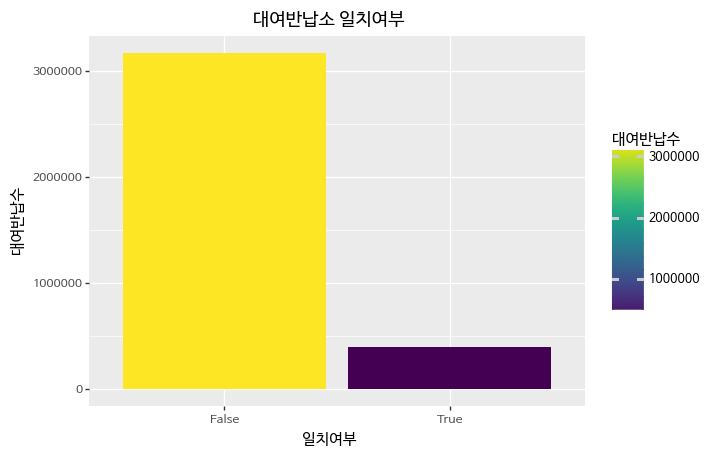

<ggplot: (434725373)>

In [49]:
# 대여반납수로 fill을 넣어주어 그래프에 색상표현이 되도록 한다.
(ggplot(df_location_diff)
 + geom_col(mapping=aes(x='일치여부', y='대여반납수', fill='대여반납수'))
 + labs(title='대여반납소 일치여부')
 + theme(text=element_text(family='NanumBarunGothic'))
)

같은 곳에서 대여반납을 하는 것보다 다른 곳으로의 대여반납이 훨씬 많은 것을 확인할 수 있다.

In [50]:
df_same_loc = df.loc[df['같은대여반납소'] == True]
df_same_loc.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여시,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일,같은대여반납소
0,SPB-02041,2018-01-01 00:00:10,227,양평2나들목 보행통로 입구,9,2018-01-01 00:04:03,227,양평2나들목 보행통로 입구,9,3,...,0,0,0,2018,1,1,0,4,0,True
26,SPB-03273,2018-01-01 00:08:54,152,마포구민체육센터 앞,1,2018-01-01 00:27:14,152,마포구민체육센터 앞,1,18,...,0,8,0,2018,1,1,0,27,0,True
140,SPB-10667,2018-01-01 00:37:45,315,신한은행 안국역지점 옆,2,2018-01-01 00:40:05,315,신한은행 안국역지점 옆,2,2,...,0,37,0,2018,1,1,0,40,0,True
142,SPB-00296,2018-01-01 00:38:31,1211,방이삼거리,1,2018-01-01 00:41:19,1211,방이삼거리,1,2,...,0,38,0,2018,1,1,0,41,0,True
160,SPB-03993,2018-01-01 00:41:53,1231,잠실역 6번출구,4,2018-01-01 00:50:58,1231,잠실역 6번출구,3,8,...,0,41,0,2018,1,1,0,50,0,True


In [51]:
# 같은 곳에서 대여반납이 이루어지는 상위 대여소(대여|반납 건 수)
df_same_loc['대여대여소명'].value_counts().head(30)

 여의나루역 1번출구 앞               9568
 뚝섬유원지역 1번출구 앞              7174
 마포구민체육센터 앞                 3313
 고속터미널역 8-1번, 8-2번 출구 사이    3235
 월드컵공원                      3151
 봉림교 교통섬                    3014
 서울숲 관리사무소                  2884
 옥수역 3번출구                   2565
 서울숲역 4번 출구 옆               2535
 노들역 1번출구                   2249
 CJ 드림시티                    2142
 당산육갑문                      2122
 청계천 생태교실 앞                 1882
 흑석역 1번출구                   1854
 몽촌토성역 1번출구 옆               1843
 한신16차아파트 119동 앞            1756
 홍대입구역 2번출구 앞               1746
 올림픽공원역 1번출구 앞              1673
 롯데월드타워(잠실역2번출구 쪽)          1624
 잠실새내역 5번 출구 뒤              1599
 홍은사거리                      1598
 외국어대 정문 앞                  1597
 IFC몰                       1568
 황금내근린공원                    1562
 현대고등학교 건너편                 1543
 마포구청 앞                     1458
 새절역 2번출구                   1420
 망원2빗물펌프장 앞                 1333
 독산보도육교 앞 자전거 보관소           1325
 홍연2교옆                      1263
Name: 대여대여

* 같은 곳에서 대여반납이 이루어지는 대여소들은 한강주변이나 공원 주변에 위치한 것을 확인해 볼 수 있다.

## 같은|다른 대여소에서 대여가 되는 자전거의 평균 이용시간
### 같은 대여반납소

In [52]:
same_loc_mean_time = df_same_loc['이용시간(분)'].mean()
print('같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', same_loc_mean_time)
df_same_mean = df_same_loc.groupby(['대여대여소명', '반납대여소명'])['이용시간(분)'].mean().reset_index()
df_same_count = df_same_loc.groupby(['대여대여소명', '반납대여소명']).size().reset_index()
df_same_count.columns = ['대여대여소명', '반납대여소명', '이용횟수']
df_same_loc2 = df_same_mean.merge(df_same_count, left_on=['대여대여소명', '반납대여소명'], right_on=['대여대여소명', '반납대여소명'])
df_same_loc2.sort_values(by='이용시간(분)', ascending=False).head(10)

같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  53.804579556810666


,대여대여소명,반납대여소명,이용시간(분),이용횟수
219,금호사거리,금호사거리,79.328205,195
213,금원빌딩 앞,금원빌딩 앞,78.857143,182
386,롯데하이마트 (상암월드컵점),롯데하이마트 (상암월드컵점),78.675676,37
630,서울 시흥동우체국 앞,서울 시흥동우체국 앞,78.405172,116
836,양원역 2번출구,양원역 2번출구,77.809524,21
810,신한은행 시흥대로금융센터지점,신한은행 시흥대로금융센터지점,77.466667,75
1216,홍은사거리,홍은사거리,77.264080,1598
118,"고속터미널역 8-1번, 8-2번 출구 사이","고속터미널역 8-1번, 8-2번 출구 사이",77.085008,3235
280,달맞이공원,달맞이공원,76.128713,101
167,구로1동우체국 앞,구로1동우체국 앞,75.714286,7


In [53]:
# 이용횟수가 많은 곳의 평균 이용시간
df_same_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,대여대여소명,반납대여소명,이용시간(분),이용횟수
854,여의나루역 1번출구 앞,여의나루역 1번출구 앞,67.884511,9568
371,뚝섬유원지역 1번출구 앞,뚝섬유원지역 1번출구 앞,59.409256,7174
406,마포구민체육센터 앞,마포구민체육센터 앞,58.369756,3313
118,"고속터미널역 8-1번, 8-2번 출구 사이","고속터미널역 8-1번, 8-2번 출구 사이",77.085008,3235
951,월드컵공원,월드컵공원,60.348778,3151
520,봉림교 교통섬,봉림교 교통섬,61.574320,3014
648,서울숲 관리사무소,서울숲 관리사무소,60.097087,2884
911,옥수역 3번출구,옥수역 3번출구,53.395322,2565
651,서울숲역 4번 출구 옆,서울숲역 4번 출구 옆,63.724655,2535
254,노들역 1번출구,노들역 1번출구,64.056470,2249


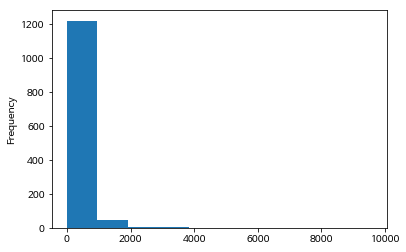

In [54]:
df_same_loc2['이용횟수'].plot.hist()

### 다른 대여|반납소

In [55]:
df_diff_loc = df.loc[df['같은대여반납소'] == False]
df_diff_loc.shape

(3164955, 26)

In [56]:
diff_loc_mean_time = df_diff_loc['이용시간(분)'].mean()
print('다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', df_diff_loc['이용시간(분)'].mean())
df_diff_mean = df_diff_loc.groupby(['대여대여소명', '반납대여소명'])['이용시간(분)'].mean().reset_index()
df_diff_count = df_diff_loc.groupby(['대여대여소명', '반납대여소명']).size().reset_index()
df_diff_count.columns = ['대여대여소명', '반납대여소명', '이용횟수']
df_diff_loc2 = df_diff_mean.merge(df_diff_count, left_on=['대여대여소명', '반납대여소명'], right_on=['대여대여소명', '반납대여소명'])
df_diff_loc2.sort_values(by='이용시간(분)', ascending=False).head(10)

다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  25.737547295301198


,대여대여소명,반납대여소명,이용시간(분),이용횟수
122172,서초4동주민센터,도곡1동 주민센터 교차로,1002.333333,3
164069,영등포역지하쇼핑센타 5번출구,장승배기역2번출구뒷편쪽,785.750000,4
226135,홍대입구역 8번출구 앞,동대문역사문화공원역 9번출구 앞,767.000000,1
203488,천왕역 4번출구 뒤,신정3동 현장민원실 앞,740.000000,1
214191,하계동 중평어린이공원 앞,장위뉴타운 꿈에 숲 코오롱 하늘채 앞,672.000000,1
41015,금호사거리,신설동역 11번출구 뒤,658.000000,1
89071,방화근린공원,녹십초요양병원앞,651.000000,1
72539,마천CU우방점 앞,강변역 4번출구 뒤,516.000000,1
114244,서울대입구역 5번출구,롯데캐슬 앞,504.000000,2
80336,목동3단지 상가,볏골공원,485.000000,1


In [57]:
df_diff_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,대여대여소명,반납대여소명,이용시간(분),이용횟수
214837,하늘채코오롱아파트 건너편,홍대입구역 2번출구 앞,8.577323,3078
225996,홍대입구역 2번출구 앞,하늘채코오롱아파트 건너편,12.960254,2365
16985,건국대학교 (입학정보관),건국대학교 학생회관,10.751000,2249
187063,장승배기역 5번출구,노량진역 5번출구,7.143432,1987
184042,자양나들목,뚝섬유원지역 1번출구 앞,8.261805,1906
17562,건국대학교 학생회관,건국대학교 (입학정보관),11.711580,1848
155811,언남초등학교 앞,청계산입구역 1번출구,6.566073,1627
183801,일진아이윌아파트 옆,홍대입구역 2번출구 앞,9.452632,1615
69242,롯데월드타워(잠실역2번출구 쪽),방이삼거리,14.396584,1581
88297,방이삼거리,롯데월드타워(잠실역2번출구 쪽),11.662628,1568


In [58]:
rent_mean_time = same_loc_mean_time - diff_loc_mean_time
print('같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 다른 대여소의 대여반납 이용시간보다 {:,.2f} 분 많다.'.format(rent_mean_time))

같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 다른 대여소의 대여반납 이용시간보다 28.07 분 많다.


* 이용횟수가 많은 대여소라고 해서 평균이용시간이 평균보다 높지는 않다.
* 하늘채코오롱아파트 건너편<->홍대입구역 2번출구 앞은 이용횟수가 가장 높은 대여반납소다.
* 관련기사
    * ['따릉이' 타고 가장 많이 다닌 경로는? - 통플러스](http://news.tongplus.com/site/data/html_dir/2018/10/24/2018102402585.html)
    * [[ONE SHOT] 따릉이, ‘이곳’서 가장 많이 빌리고 ‘여기’서 가장 많이 탄다](https://news.joins.com/article/23003297)

## 해당 기간동안 가장 많이 이용된 자전거는 몇 회 대여 되었을까?

In [59]:
bike_describe = df['자전거번호'].describe()
print('대여된 자전거 수 :', bike_describe[1])
print('가장 많이 대여된 자전거 번호 :', bike_describe[2])
print('가장 많이 대여된 자전거의 대여횟수 :', bike_describe[3])
bike_describe

대여된 자전거 수 : 16683
가장 많이 대여된 자전거 번호 : SPB-08164
가장 많이 대여된 자전거의 대여횟수 : 578


count       3567221
unique        16683
top       SPB-08164
freq            578
Name: 자전거번호, dtype: object

In [60]:
bike_rent_counts = df['자전거번호'].value_counts().reset_index()
bike_rent_counts.columns = ['자전거번호', '대여수']
print('해당 기간동안 자전거 하나당 평균 대여 수:', bike_rent_counts['대여수'].mean())
print('자전거 하나당 가장 많이 대여된 횟수:', bike_rent_counts['대여수'].max())
print('자전거 하나당 가장 적게 대여된 횟수:', bike_rent_counts['대여수'].min())

해당 기간동안 자전거 하나당 평균 대여 수: 213.82371276149374
자전거 하나당 가장 많이 대여된 횟수: 578
자전거 하나당 가장 적게 대여된 횟수: 1


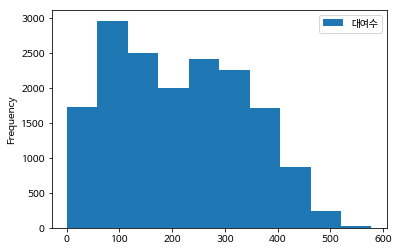

In [61]:
bike_rent_counts.plot.hist()

In [62]:
# 가장 많이 대여된 자전거의 대여이력
most_bike_df = df.loc[df['자전거번호'] == bike_describe[2]]
most_bike_df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여시,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일,같은대여반납소
5967,SPB-08164,2018-01-02 08:06:31,1258,가락미륭아파트 앞,6,2018-01-02 08:13:03,1201,가락시장역 3번 출구,5,5,...,8,6,1,2018,1,2,8,13,1,False
7125,SPB-08164,2018-01-02 10:38:19,1201,가락시장역 3번 출구,5,2018-01-02 10:44:47,1243,문정 법조단지7,12,5,...,10,38,1,2018,1,2,10,44,1,False
47477,SPB-08164,2018-01-08 12:39:29,1243,문정 법조단지7,12,2018-01-08 12:58:04,1243,문정 법조단지7,7,16,...,12,39,0,2018,1,8,12,58,0,True
48222,SPB-08164,2018-01-08 14:46:25,1243,문정 법조단지7,7,2018-01-08 14:55:05,1201,가락시장역 3번 출구,2,7,...,14,46,0,2018,1,8,14,55,0,False
50117,SPB-08164,2018-01-08 21:13:17,1201,가락시장역 3번 출구,2,2018-01-08 22:08:14,2250,서초유치원 맞은편,4,49,...,21,13,0,2018,1,8,22,8,0,False


In [63]:
most_bike_df['대여대여소명'].value_counts()

 뚝섬유원지역 1번출구 앞              12
 이촌1동 주민센터 뒤                10
 망원역 1번출구 앞                  6
 하늘채코오롱아파트 건너편               6
 마포역 1번출구 뒤                  6
 서강대 남문 옆                    5
 도림천 신화교                     5
 홍대입구역 2번출구 앞                5
 구로디지털단지역 앞                  5
 자양사거리 광진아크로텔 앞              5
 광남중학교                       4
 일진아이윌아파트 옆                  4
양재역 11번 출구 앞                 4
 고속터미널역 8-1번, 8-2번 출구 사이     4
 봉림교 교통섬                     4
 잠실새내역 5번 출구 뒤               4
 KAIST 경영대학 앞                4
 서교동 사거리                     4
 성수사거리 버스정류장 앞               4
 성수2가1동 공영주차장 인근             3
 건국대학교 (입학정보관)               3
 홍대입구역 8번출구 앞                3
 외국어대 정문 앞                   3
 신대방삼거리역 6번출구쪽               3
 서울 월드컵 경기장                  3
 문정 법조단지7                    3
 마포구청역                       3
 공덕역 2번출구                    3
 서울신성초등학교                    3
 상암중학교 옆                     3
                            ..
 NH농협은행 앞                    1
 광화문역 1번

In [64]:
rent_station = most_bike_df['대여대여소명'].unique()
rent_station

array([' 가락미륭아파트 앞', ' 가락시장역 3번 출구', ' 문정 법조단지7', ' 서초유치원 맞은편',
       '양재역 11번 출구 앞', ' 뱅뱅사거리 랜드마크타워 앞', ' 삼호물산버스정류장(23370) 옆',
       ' 3호선 매봉역 3번출구앞', '서울남부터미널 대합실 입구', 'KT 서초지사 앞', '하나은행 방배동지점 앞',
       '방배열린문화센터 앞', '뒷벌공원 옆', '이수역 4번 출구', ' 반포본동 주민센터 앞', ' 여의도초교 앞',
       ' 진주아파트상가 앞', ' 앙카라공원 앞', ' 시범아파트버스정류장 옆', ' 삼부아파트1동 앞',
       ' 대방역6번출구', ' 미성아파트 A동 앞', ' 금융감독원 앞', ' 국민일보 앞', ' 마포역 4번출구 뒤',
       ' 애오개역 4번출구 앞', ' 마포역 1번출구 뒤', ' 마포 신수공원 앞', ' 연희교차로 인근',
       ' 중앙근린공원', ' 충정로역 7번출구 뒤', ' 서울혁신파크', ' 마포구청 앞', ' 서교동 사거리',
       ' 하늘채코오롱아파트 건너편', ' 홍대입구역 2번출구 앞', ' SK망원동주유소 건너편',
       ' DMC산학협력연구센터 앞', ' DMC역 9번출구 앞', ' LG CNS앞', ' 마포구청역 ',
       ' 일진아이윌아파트 옆', ' 월드컵공원', ' 녹번역 4번출구', ' CJ 드림시티', ' 이마트 은평점',
       ' 은평예술회관', ' 새절역 2번출구', ' 월드컵경기장역 3번출구 옆', ' 정명학원', ' 극동방송국 앞',
       ' 사루비아 빌딩 앞', ' 서울서부지방법원 앞', ' 공덕역 2번출구', ' 서강대 남문 옆', ' 마포소방서 앞',
       ' 역촌파출소', ' 홈플러스 앞', ' 서울 월드컵 경기장', ' 구산역 4번출구', ' 국민은행 연서지점',
       ' LG서비스 역촌점', ' 스타벅스앞', ' 신대방삼거리역 6번출구쪽', ' 

In [65]:
# 대여소명 앞에 들어간 공백을 제거합니다.
bike_move = []
for s in rent_station:
    bike_move.append(s.strip())
    
bike_move    

['가락미륭아파트 앞',
 '가락시장역 3번 출구',
 '문정 법조단지7',
 '서초유치원 맞은편',
 '양재역 11번 출구 앞',
 '뱅뱅사거리 랜드마크타워 앞',
 '삼호물산버스정류장(23370) 옆',
 '3호선 매봉역 3번출구앞',
 '서울남부터미널 대합실 입구',
 'KT 서초지사 앞',
 '하나은행 방배동지점 앞',
 '방배열린문화센터 앞',
 '뒷벌공원 옆',
 '이수역 4번 출구',
 '반포본동 주민센터 앞',
 '여의도초교 앞',
 '진주아파트상가 앞',
 '앙카라공원 앞',
 '시범아파트버스정류장 옆',
 '삼부아파트1동 앞',
 '대방역6번출구',
 '미성아파트 A동 앞',
 '금융감독원 앞',
 '국민일보 앞',
 '마포역 4번출구 뒤',
 '애오개역 4번출구 앞',
 '마포역 1번출구 뒤',
 '마포 신수공원 앞',
 '연희교차로 인근',
 '중앙근린공원',
 '충정로역 7번출구 뒤',
 '서울혁신파크',
 '마포구청 앞',
 '서교동 사거리',
 '하늘채코오롱아파트 건너편',
 '홍대입구역 2번출구 앞',
 'SK망원동주유소 건너편',
 'DMC산학협력연구센터 앞',
 'DMC역 9번출구 앞',
 'LG CNS앞',
 '마포구청역',
 '일진아이윌아파트 옆',
 '월드컵공원',
 '녹번역 4번출구',
 'CJ 드림시티',
 '이마트 은평점',
 '은평예술회관',
 '새절역 2번출구',
 '월드컵경기장역 3번출구 옆',
 '정명학원',
 '극동방송국 앞',
 '사루비아 빌딩 앞',
 '서울서부지방법원 앞',
 '공덕역 2번출구',
 '서강대 남문 옆',
 '마포소방서 앞',
 '역촌파출소',
 '홈플러스 앞',
 '서울 월드컵 경기장',
 '구산역 4번출구',
 '국민은행 연서지점',
 'LG서비스 역촌점',
 '스타벅스앞',
 '신대방삼거리역 6번출구쪽',
 '서울신성초등학교',
 '영어마을 관악캠프',
 '낙성대 과학전시관',
 '도림천 신화교',
 '대림역4번출구',
 '구로디지털단지역 앞',
 '그랜드컨벤션센터 앞',
 '서울시 

In [66]:
stations = pd.read_csv('data/bike_rent_station.csv')
stations.shape

(1461, 5)

In [67]:
bike_move_df = pd.DataFrame(bike_move)
bike_move_df.columns = ['대여소']
print(bike_move_df.shape)
bike_move_df.head()

(361, 1)


,대여소
0,가락미륭아파트 앞
1,가락시장역 3번 출구
2,문정 법조단지7
3,서초유치원 맞은편
4,양재역 11번 출구 앞


In [68]:
bike_move_df = bike_move_df.merge(stations, left_on='대여소', right_on='대여소', how='left')
bike_move_df.shape

(361, 5)

In [69]:
bike_move_df.head()

,대여소,상태,주소,위도,경도
0,가락미륭아파트 앞,운영중,서울특별시 서울 송파구 가락동 195-4 가락미륭아파트 앞,37.493198,127.128998
1,가락시장역 3번 출구,운영중,서울특별시 송파구 송파대로 지하 257 송파구 가락동 214-3,37.493179,127.118546
2,문정 법조단지7,운영중,서울특별시 송파구 법원로 101 문정동 346-2,37.484531,127.120163
3,서초유치원 맞은편,운영중,서울특별시 서초구 양재대로2길 74 우면동 754,37.455799,127.016289
4,양재역 11번 출구 앞,운영중,서울특별시 서초구 남부순환로 지하 2585 서초구 양재동 105-4,37.483990,127.034180


In [70]:
bike_move_df.isnull().sum()

대여소     0
상태     15
주소     15
위도     15
경도     15
dtype: int64

## 가장 많이 대여된 자전거가 거쳐간 대여소

In [71]:
# 정보가 없는 대여소
bike_move_df.loc[bike_move_df['경도'].isnull()]

,대여소,상태,주소,위도,경도
26,마포역 1번출구 뒤,NaN,NaN,NaN,NaN
30,충정로역 7번출구 뒤,NaN,NaN,NaN,NaN
71,서울시 도로환경관리센터,NaN,NaN,NaN,NaN
91,창천문화공원,NaN,NaN,NaN,NaN
113,대림역 1번 출입구 밑,NaN,NaN,NaN,NaN
121,화곡역 6번출구,NaN,NaN,NaN,NaN
177,탑골공원 앞,NaN,NaN,NaN,NaN
178,종암 농협지점 앞,NaN,NaN,NaN,NaN
215,강서초등학교,NaN,NaN,NaN,NaN
232,성동광진 교육지원청 앞,NaN,NaN,NaN,NaN


In [72]:
# 지도 표현을 위해 folium 을 import 한다.
# 데이터 프레임에서 위도와 경도의 평균값을 구한다. 이 값으로 지도의 중심이 될 좌표를 정한다.
# zoom_start는 지도를 얼마나 확대해서 볼것인지다.
# tiles는 지도의 스타일이다.
import folium 

geo_df = bike_move_df
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    if geo_df.loc[n, '위도'] > 0 and geo_df.loc[n, '경도'] > 0 :
        loc_name = geo_df.loc[n, '대여소']

        icon_color = 'red'
        folium.Circle(
            location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
            popup=loc_name,
            radius=50,
            color=icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)
    
map